In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import eikon as ek      

In [2]:
ek.set_app_key('09700bef03d94df0addb1a064f814556a42ae997')

In [3]:
rics = ["AZN.L","BATS.L","GSK.L","STAN.L","SHEL.L","RKT.L","ULVR.L","BP.L","CRH.L", "GLEN.L"]

In [4]:
data = ek.get_timeseries(rics, 
                        fields = 'CLOSE',
                        start_date = '2020-01-01',
                        end_date = '2022-11-13')
data.head()

CLOSE,AZN.L,BATS.L,GSK.L,STAN.L,SHEL.L,RKT.L,ULVR.L,BP.L,CRH.L,GLEN.L
Date,,,,,,,,,,
2021-09-06,8645,2738.0,1503.175013,459.3,1443.2,5720,4002.0,298.45,3824.0,331.438706
2021-09-07,8470,2722.5,1485.599925,459.1,1442.2,5844,3989.0,298.4,3784.0,330.850701
2021-09-08,8314,2723.0,1467.620813,452.5,1434.2,5814,4022.5,298.25,3733.0,327.518674
2021-09-09,8204,2663.0,1441.157175,443.4,1417.8,5707,3965.5,294.7,3721.0,325.509657
2021-09-10,8173,2655.5,1433.884725,440.0,1418.8,5684,3959.0,295.65,3681.0,329.282688


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2021-09-06 to 2022-11-11
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AZN.L   300 non-null    Int64  
 1   BATS.L  300 non-null    Float64
 2   GSK.L   300 non-null    Float64
 3   STAN.L  300 non-null    Float64
 4   SHEL.L  300 non-null    Float64
 5   RKT.L   300 non-null    Int64  
 6   ULVR.L  300 non-null    Float64
 7   BP.L    300 non-null    Float64
 8   CRH.L   300 non-null    Float64
 9   GLEN.L  300 non-null    Float64
dtypes: Float64(8), Int64(2)
memory usage: 28.7 KB


In [6]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2021-09-06 to 2022-11-11
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AZN.L   300 non-null    Int64  
 1   BATS.L  300 non-null    Float64
 2   GSK.L   300 non-null    Float64
 3   STAN.L  300 non-null    Float64
 4   SHEL.L  300 non-null    Float64
 5   RKT.L   300 non-null    Int64  
 6   ULVR.L  300 non-null    Float64
 7   BP.L    300 non-null    Float64
 8   CRH.L   300 non-null    Float64
 9   GLEN.L  300 non-null    Float64
dtypes: Float64(8), Int64(2)
memory usage: 28.7 KB


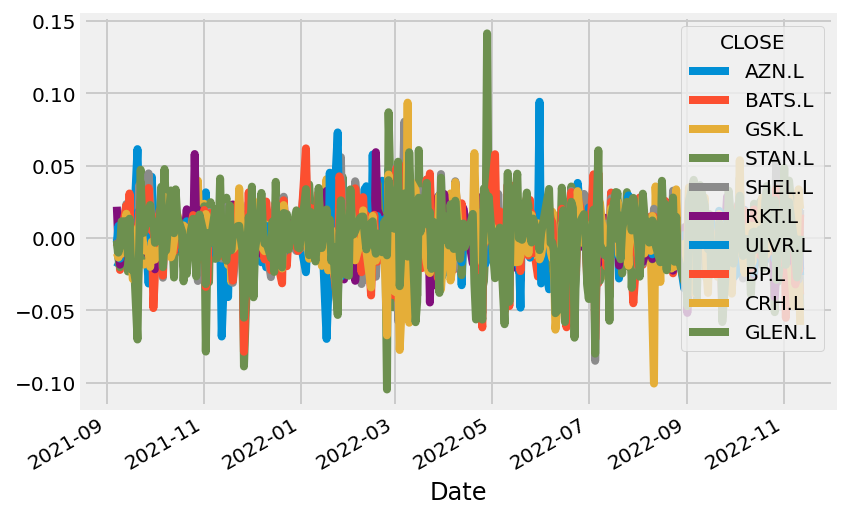

In [7]:
returns = data.pct_change().plot()

In [8]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

In [9]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix):
    results = np.zeros((2,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(12)
        weights = np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
    return results, weights_record

In [10]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((10,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(10)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        ## Sharpe Ratio
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev   
    return results, weights_record

In [11]:
returns = data.pct_change()
mean_returns = returns.mean()
print("Mean Returns")
print(mean_returns)
print('\n')
cov_matrix = returns.cov()
print("Covariance Matrix")
print(cov_matrix)
num_portfolios = 25000
risk_free_rate = 0.037

Mean Returns
CLOSE
AZN.L     0.000820
BATS.L    0.000605
GSK.L    -0.000317
STAN.L    0.001000
SHEL.L    0.001856
RKT.L     0.000003
ULVR.L    0.000055
BP.L      0.001809
CRH.L    -0.000251
GLEN.L    0.001658
dtype: float64


Covariance Matrix
CLOSE      AZN.L    BATS.L     GSK.L    STAN.L    SHEL.L     RKT.L    ULVR.L  \
CLOSE                                                                          
AZN.L   0.000278  0.000063  0.000136  0.000077  0.000031  0.000056  0.000048   
BATS.L  0.000063  0.000193  0.000076  0.000124  0.000083  0.000049  0.000057   
GSK.L   0.000136  0.000076  0.000215  0.000095  0.000044  0.000058  0.000052   
STAN.L  0.000077  0.000124  0.000095  0.000609  0.000215  0.000061  0.000068   
SHEL.L  0.000031  0.000083  0.000044  0.000215  0.000421 -0.000043 -0.000012   
RKT.L   0.000056  0.000049  0.000058  0.000061 -0.000043  0.000202  0.000086   
ULVR.L  0.000048  0.000057  0.000052  0.000068 -0.000012  0.000086  0.000216   
BP.L    0.000050  0.000098  0.000062

In [12]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.3
Annualised Volatility: 0.19


CLOSE       AZN.L  BATS.L  GSK.L  STAN.L  SHEL.L  RKT.L  ULVR.L   BP.L  CRH.L  \
allocation  12.59   12.21   0.68    0.95   19.24   7.08    8.95  14.57   1.61   

CLOSE       GLEN.L  
allocation   22.13  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.11
Annualised Volatility: 0.15


CLOSE       AZN.L  BATS.L  GSK.L  STAN.L  SHEL.L  RKT.L  ULVR.L  BP.L  CRH.L  \
allocation   8.78   14.64  13.29    0.56    3.55  12.73   24.04   3.9   6.95   

CLOSE       GLEN.L  
allocation   11.56  


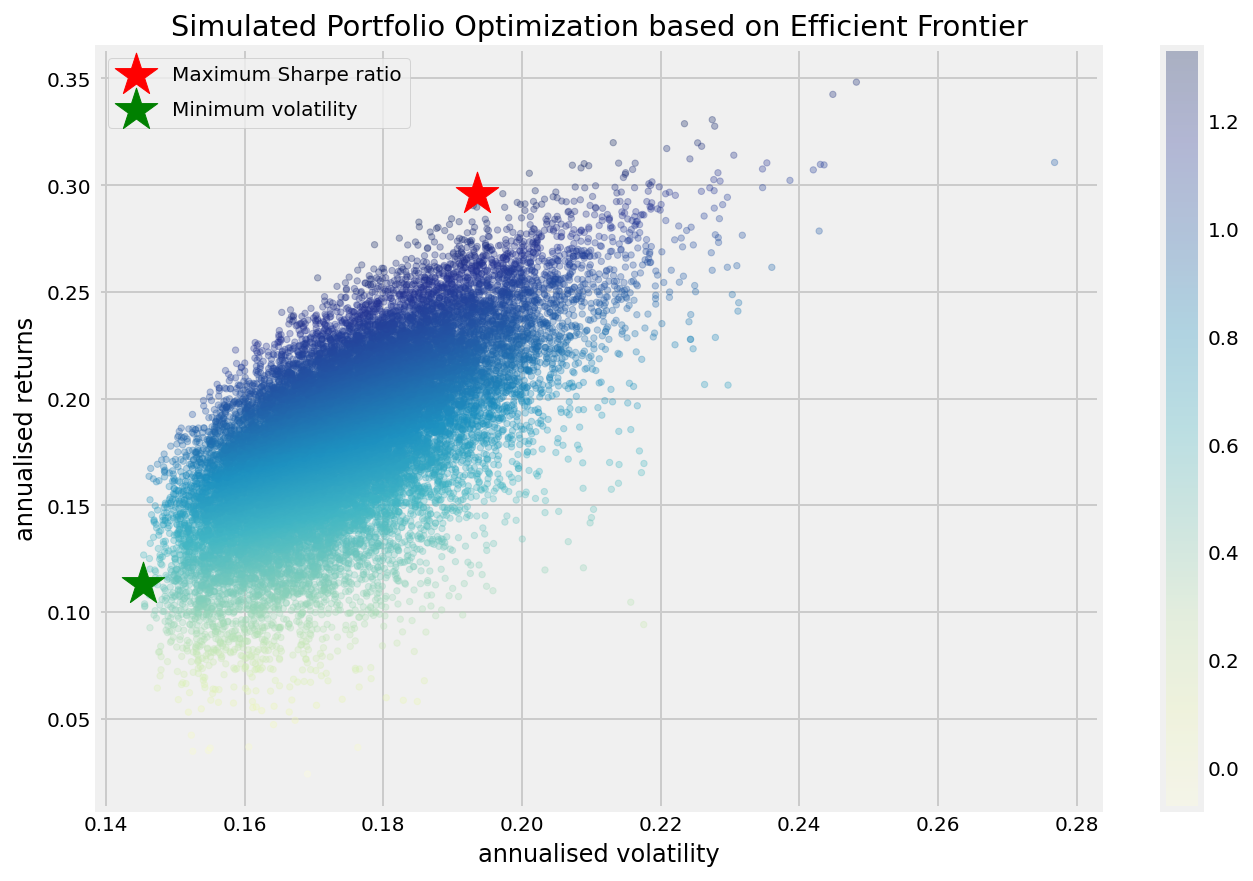

In [13]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

#### Lets move beyond the randam portfolio above and seek the optimal portfolio which will maximise the Sharpe ratio or minimize volatility

In [14]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [15]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

#### Gather the measurments of the individual shares 

In [16]:
print(mean_returns)

CLOSE
AZN.L     0.000820
BATS.L    0.000605
GSK.L    -0.000317
STAN.L    0.001000
SHEL.L    0.001856
RKT.L     0.000003
ULVR.L    0.000055
BP.L      0.001809
CRH.L    -0.000251
GLEN.L    0.001658
dtype: float64


In [17]:
print(np.std(returns))

CLOSE
AZN.L     0.016634
BATS.L    0.013884
GSK.L     0.014648
STAN.L    0.024634
SHEL.L    0.020487
RKT.L     0.014190
ULVR.L    0.014685
BP.L      0.021361
CRH.L     0.018953
GLEN.L    0.023111
dtype: float64


#### Function for estimating the return of the efficient portfolio

In [18]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

#### What is your target return for the portfolio and is it feasible?

In [27]:
efficient_frontier(mean_returns,cov_matrix,[0.45])

[     fun: 0.29750871052644123
      jac: array([ 0.03331111,  0.06661991,  0.03946885,  0.18104307,  0.31685856,
        -0.03195618, -0.01290639,  0.30374485,  0.07856981,  0.26268574])
  message: 'Optimization terminated successfully'
     nfev: 110
      nit: 10
     njev: 10
   status: 0
  success: True
        x: array([2.58639425e-02, 0.00000000e+00, 1.20068614e-16, 1.94749815e-17,
        7.43075520e-01, 1.61198840e-17, 2.24827955e-17, 1.22020117e-02,
        0.00000000e+00, 2.18858525e-01])]

#### Estimate results of the selected (optimal) portfolio and visualise it

In [20]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    print("-"*80)
    print("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(data.columns):
        print(txt,":","annualised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(data.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.38
Annualised Volatility: 0.23


CLOSE       AZN.L  BATS.L  GSK.L  STAN.L  SHEL.L  RKT.L  ULVR.L  BP.L  CRH.L  \
allocation  30.28     0.0    0.0     0.0   51.23    0.0     0.0   0.0    0.0   

CLOSE       GLEN.L  
allocation   18.49  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.12
Annualised Volatility: 0.14


CLOSE       AZN.L  BATS.L  GSK.L  STAN.L  SHEL.L  RKT.L  ULVR.L  BP.L  CRH.L  \
allocation   8.82   13.01  10.12     0.0   12.19  25.16    20.1   0.0   2.29   

CLOSE       GLEN.L  
allocation    8.32  
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

AZN.L : annualised return 0.21 , annualised volatility: 0.26
BATS.L : annualised return 0.15 , annualised volatility: 

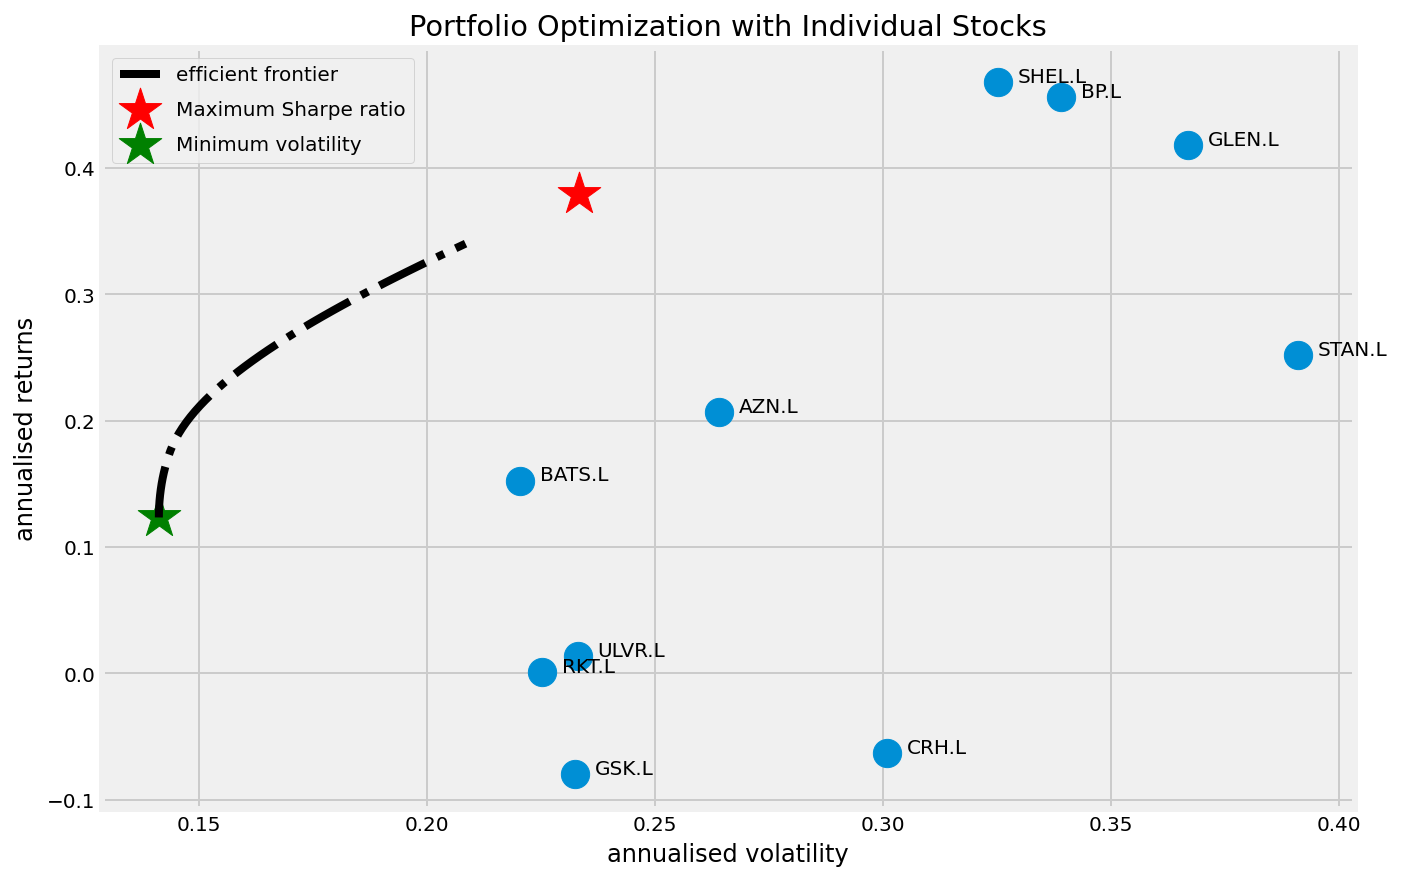

In [21]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)